**Approach to the problem**
*   Load the data and libraries
*   Data Preparation and Transformation
*   Visualization
*   Analysis
    * Uni-Variate
    * Bi-Variate
    * Multi-Variate
       * Supervised
          * Classification: Y is discrete (0/1)
          * Regression: Y is continuous
       * Unsupervised


# Load the data and libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


Load the data

In [ ]:
train= pd.read_csv('/content/train_v9rqX0R.csv')
test = pd.read_csv('/content/test_AbJTz2l.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Exploratory Data Analysis [Uni Variate & Bi Variate]


In [ ]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<ipython-input-8-5e4634df27e2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Item_Weight'],kde=True)


<Axes: xlabel='Item_Weight', ylabel='Density'>

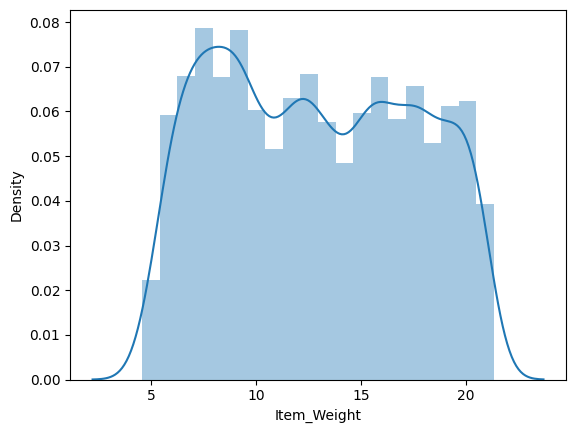

In [ ]:
sns.distplot(train['Item_Weight'],kde=True)


In [ ]:
train.skew()

<ipython-input-9-1d3a3c99b9d6>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.skew()


Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

<ipython-input-10-8b45cd995c3e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Item_Visibility'],kde=True)


<Axes: xlabel='Item_Visibility', ylabel='Density'>

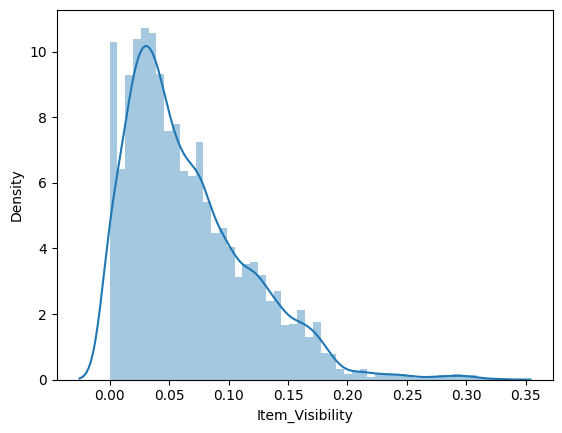

In [ ]:
sns.distplot(train['Item_Visibility'],kde=True)

<Axes: ylabel='Item_Visibility'>

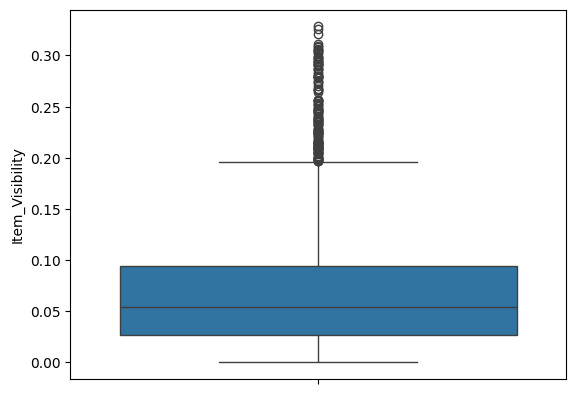

In [ ]:
sns.boxplot(train['Item_Visibility'])

<ipython-input-25-656622103411>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Item_MRP'])


<Axes: xlabel='Item_MRP', ylabel='Density'>

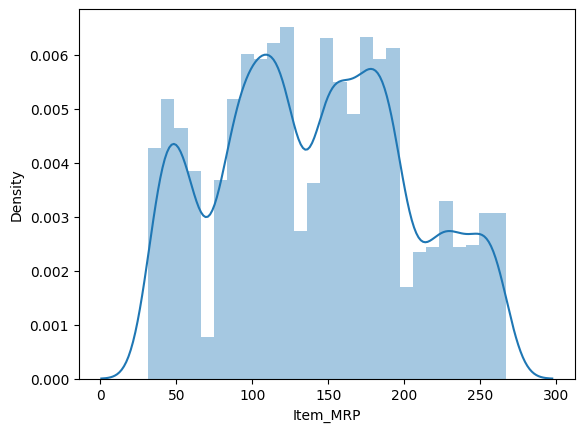

In [ ]:
sns.distplot(train['Item_MRP'])

<ipython-input-26-c0f100acf27e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Outlet_Establishment_Year'],kde=True)


<Axes: xlabel='Outlet_Establishment_Year', ylabel='Density'>

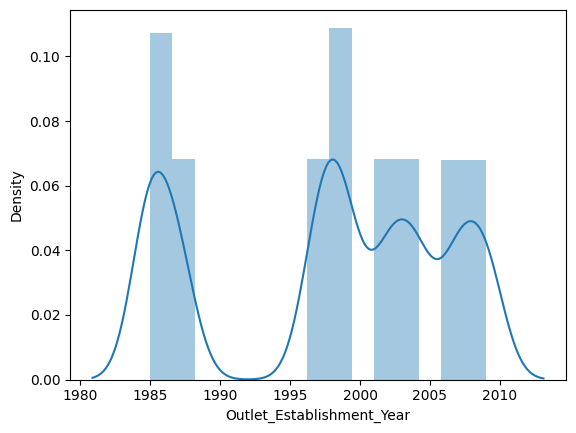

In [ ]:
sns.distplot(train['Outlet_Establishment_Year'],kde=True)

<ipython-input-27-c6175e048210>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Item_Outlet_Sales'],kde=True)


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

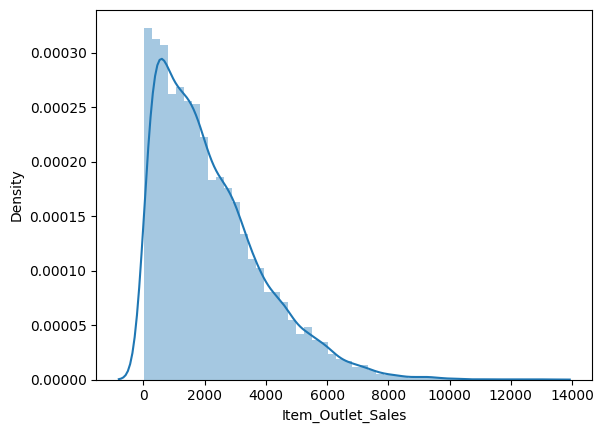

In [ ]:
sns.distplot(train['Item_Outlet_Sales'],kde=True)

In [ ]:
#Valuation of categorical variable

<Axes: >

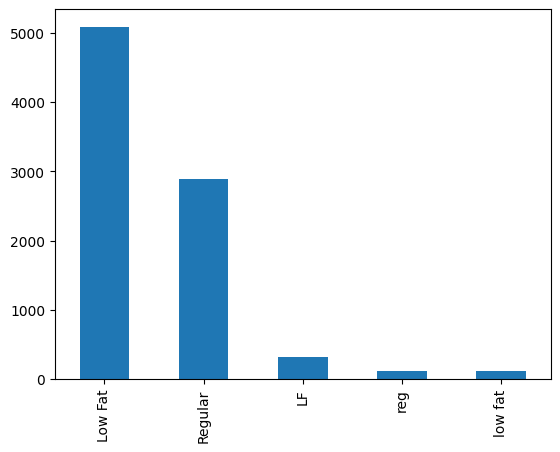

In [ ]:
train['Item_Fat_Content'].value_counts().plot(kind='bar')

<Axes: >

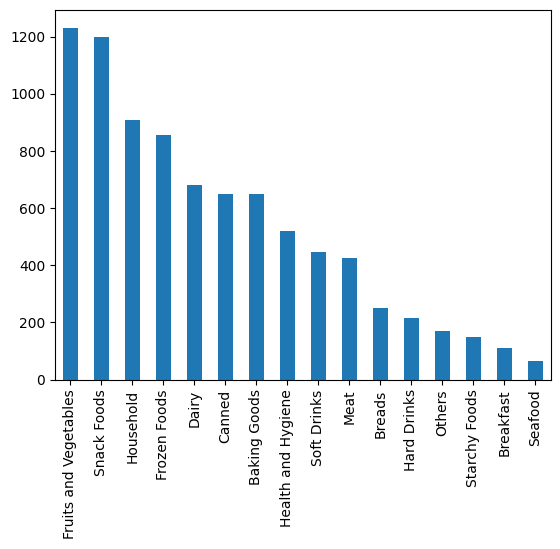

In [ ]:
train['Item_Type'].value_counts().plot(kind='bar')

Homework:
Do all the other columns(variables) and give insights to each one
Revise testing of hypothesis

<Axes: >

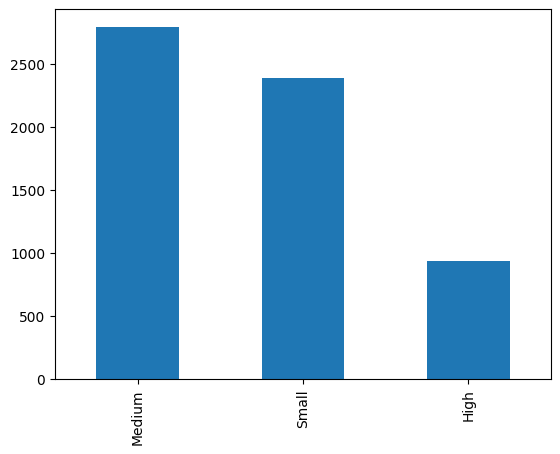

In [ ]:
train['Outlet_Size'].value_counts().plot(kind='bar')

There are only three kinds of outlet sizes and it can be seen that there are somewhat low high size outlets compared to medium and small sized outlets

<Axes: >

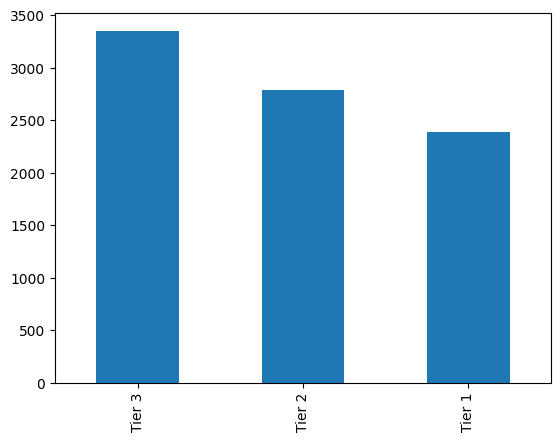

In [ ]:
train['Outlet_Location_Type'].value_counts().plot(kind='bar')

There are three tiers of outlets and it describes the location of the outlet with the nicest being 'Tier 1' but it can be seen that there are more number of tier 3 outlets than tier 1 & tier 2.

<Axes: >

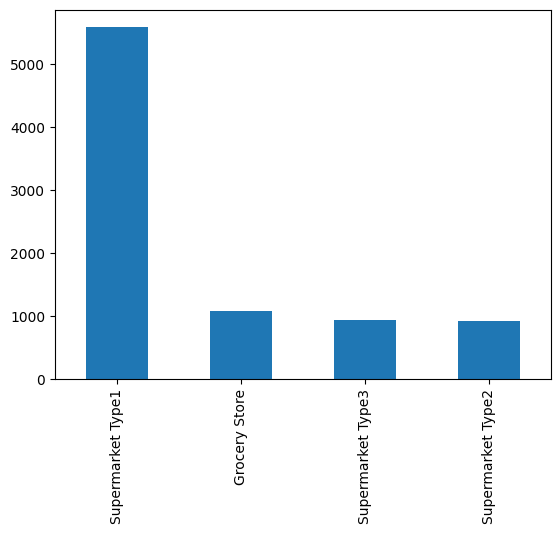

In [ ]:
train['Outlet_Type'].value_counts().plot(kind="bar")

# Bi Variate Analysis


In [ ]:
train.corr()

<ipython-input-8-0bc27f030cd9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<ipython-input-9-8ae1bc75c7f8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),annot=True)


<Axes: >

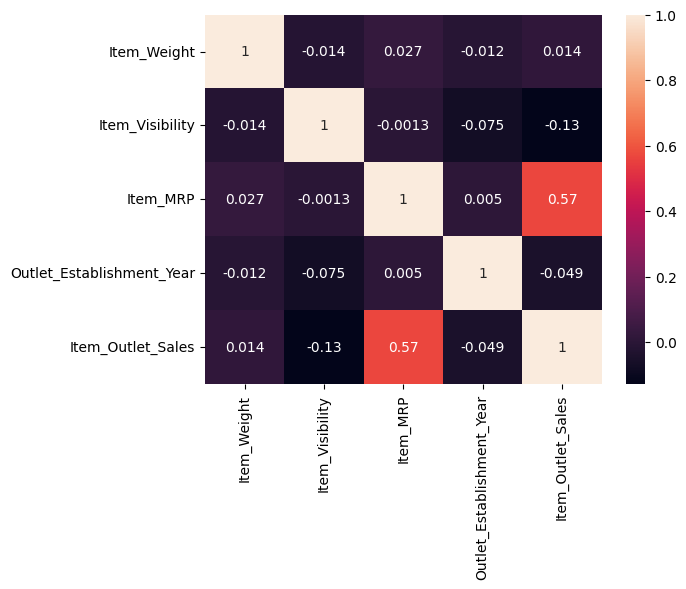

In [ ]:
sns.heatmap(train.corr(),annot=True)

Chi square test

In [ ]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [ ]:
pd.crosstab(train['Outlet_Location_Type'],train['Outlet_Size'])

Outlet_Size,High,Medium,Small
Outlet_Location_Type,,,
Tier 1,0,930,1458
Tier 2,0,0,930
Tier 3,932,1863,0




*   Null hypothesis - Outlet_Location_Type and Outlet_Size are independent
*   Alternate hypothesis - Oultet_Location_Type and Outlet_Size are dependent



In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
def chi2_sq_test(var1,var2):
  contingency_table=pd.crosstab(var1,var2)
  _,pvalue,_,_ = chi2_contingency(contingency_table)
  if pvalue<0.05:
    print("Accept the Alternative hypothesis",round(pvalue,2))
  else:
    print("Do not accept the Alternative hypothesis",round(pvalue,2))
  return contingency_table

In [ ]:
chi2_sq_test(train['Outlet_Size'],train['Outlet_Location_Type'])

Accept the Alternative hypothesis 0.0


Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,0,1863
Small,1458,930,0


In [ ]:
#Assumptions of Linear regression
#ANOVA